In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
data = work.updated_world_indices1(category = 'All', timeframe='Daily')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  9<sup>th</sup> January, 2021
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [47]:
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = data[0]
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg(%)', '$1D(%)', '$1W(%)', '$YTD(%)']] = data2[['Chg (%)', '$1D(%)', '$1W(%)', '$YTD(%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return", zmax=np.percentile(rawdata[timeperiod], 90)*100, zmin=np.percentile(rawdata[timeperiod], 1)*100))

    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('1 Week USD Returns', '$1W(%)'), ('YTD USD Returns', '$YTD(%)')),
                                                value = '$1W(%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', options=(('1 Week USD Returns', '$1W(%)'), ('Y…

<a id ="eq"></a>
## World Equities

### USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [27]:
def hmap(sortby):
    hmap = data[0].drop(['Chg', 'Chg (%)', '$1D(%)'], axis=1).sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", '$1W(%)': "{:.2%}", '$YTD(%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly USD Returns', '$1W(%)'), ('YTD USD Returns', '$YTD(%)')),
                                                value = '$1W(%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly USD Returns', '$1W(%)'), ('YTD USD R…

**HIGHLIGHTS**:

- **Wall Street:** All 3 main stock indexes in the US finished at record highs on Friday as investors focus on prospects of a swift economic recovery and more fiscal stimulus under the new Biden presidency and a Democrat-controlled Congress. Democratic [Senator Joe Manchin said he would “absolutely not” support a new round of stimulus checks](https://www.cnbc.com/2021/01/08/senator-joe-manchin-casts-doubts-on-2000-stimulus-checks.html) although [Joe Biden later said his economic package will be in the trillions](https://www.ft.com/content/b69a5de3-e334-48db-8d74-c52068476bb8) of dollars. Meanwhile, the jobs report showed the [US economy shed 140K jobs in December](https://finance.yahoo.com/news/december-jobs-report-payrolls-coronavirus-pandemic-2020-labor-200212779.html), mainly due to losses in leisure and hospitality, private education, and government while manufacturing employment came higher-than-expected. The Dow Jones added 57 points or 0.2% to 31098, the S&P 500 gained 21 points or 0.6% to 3825 and the Nasdaq closed 135 points or 1% higher at 13202. On the week, the Dow gained 1.6%, the S&P 500 1.8% and the Nasdaq 2.4%.


- The CAC 40 (**FRANCE**) added 0.7% to 5,707 on Friday, its highest close since February 24th, extending gains for the 3rd straight session, as investors' focus turns to the economic recovery and prospects of more stimulus after the Democrats won control of the Senate and as the US suspended plans to impose a 25% tariff on French luxury goods. For the week, the CAC 40 advanced 2.8%. Meanwhile, France's industrial production dropped 0.9% from a month earlier in November 2020, following an upwardly revised 1.9% growth in the previous month. However, The IHS Markit France Composite PMI rose to 49.5 in December of 2020 from 40.6 in the previous month and slightly below a preliminary estimate of 49.6. Services activity continued to contract although the least in four months (PMI at 49.1 vs 38.8) while manufacturers posted a fresh expansion in output (PMI at 51.1 vs 49.6).



- The IBEX 35 (**SPAIN**) closed up 0.3% at 8,408 on Friday, its highest level since March 5th 2020, in line with its European peers. The index booked a 4.1% weekly gain. In Spain, coronavirus infections continue to accelerate after the Health Ministry reported 42,360 new cases on Thursday, which brought the country's total recorded cases to beyond 2 million for the first time. At the same time, several regions, including Catalonia and Murcia, began to enforce or announce stricter anti-COVID measures on Thursday as Spain’s long holiday season came to an end. Gains were led by bank shares on Thursday, after Economy Minister Nadia Calvino said the Spanish GDP likely expanded in the fourth quarter of last year, adding that she is convinced the economy will grow in 2021 and much faster than other big European countries. Meanwhile, The IHS Markit Spain Services PMI rose to 48 in December of 2020 from 38.5 in the previous month, above market expectations of 45. However, The number of unemployed in Spain increased by 36.8K from a month earlier to 3.89M in December of 2020.


- The FTSE 100 (**UK**) rose 6.4% WoW and added 0.2% to close at 6,873 on Friday, its highest level since February 2020, with housebuilders among the best performers after [Barratt, Britain’s biggest house builder, reported a strong annual increase of home sales](https://www.reuters.com/article/us-barratt-dev-outlook/uks-barratt-may-resume-dividends-as-half-yearly-home-sales-surge-idUSKBN29D0X8) in the six months to December. UK house prices rose 6% from a year earlier in December to an average 253,374 GBP, the most on record, following a biggest on record gain of 7.6% in November. On a monthly basis, house prices increased 0.2% stretching the current run of continuous gains to six months. “In the near-term, and with mortgage approvals still sitting at a 13-year high, there may be enough residual strength in the market to sustain prices up to the deadline for the stamp duty holiday and the scaling back of Help to Buy at the end of March. Elsewhere, the money markets now expect [Bank of England to cut interest rates into negative territory](https://www.reuters.com/article/britain-sterling/update-1-sterling-stutters-as-uk-negative-rates-speculation-swirls-idUSL1N2JI1PE) as early as May, with few analysts expecting an even earlier cut, compared with an August estimate made last month.


- The Shanghai Composite (**CHINA**) rose 3.6% this week while China A50 rose almost 6% in USD terms even after MSCI said it would drop three of China's biggest telecommunications companies from several of its global equity benchmark indices in response to a US executive order restricting ownership of companies with purported ties to the Chinese military. Shares of China Mobile fell 5.43%, while shares of China Telecom dropped 7.39% and China Unicom fell 5.62% in Hong Kong Trade. On the coronavirus front, ordering the lockdown of Shijiazhuang, a city of 11 million people near Beijing. Meantime, Secretary of State Mike Pompeo said Thursday Washington may sanction those involved in the arrest of over 50 people in Hong Kong. In Hong Kong, the Hang Seng Index added 2.32% this week to reach fresh 11-month highs. On the data front, China's foreign exchange reserves rose to USD 3.217 trillion in December, the highest since May 2016.



- The Nikkei 225 (**JAPAN**) surged 2.36% to fresh 30-year highs of 28139.03 on Friday, extending gains of 1.6% in the previous session and adding 3% for the week. The au Jibun Bank Japan Manufacturing PMI was revised higher to 50.0 in December 2020, up from a preliminary estimate of 49.7 and a final 49.0 in November. It was the highest PMI reading since April 2019. In local news, Prime Minister Yoshihide Suga declared a state of emergency in the Tokyo metropolitan area on Thursday, authorizing more robust measures to fight a recent surge in coronavirus infections with the Tokyo metropolitan area aiming for a 70% reduction in commuters, a government minister said Friday, as Japan reported a record 7563 new infections on Thursday. In local data, household spending in Japan rose 1.1% in real terms in November from the previous year following a 1.9% gain in the previous month while the country's leading economic index jumped to a three-year high.


- The KOSPI (**SOUTH KOREA**) added 3.55% to fresh record valuations of 3139.19 on Friday following a 2.54% lift in yesterday’s session and closing 6.51% higher for the week. The IHS Markit South Korea Manufacturing PMI stood at 52.9 in December 2020, unchanged from the previous month's ten-year high. [Exports from South Korea surged 12.6% YoY](https://www.telecomlead.com/telecom-chips/chip-exports-from-south-korea-to-top-100-bn-this-year-98279) to USD 51.4 billion in December 2020, after a 4% rise in the previous month, far above market consensus of 5.6% rise, a preliminary estimate showed. Exports of chips surged by 30%, the fastest pace since August 2018, while those of displays and mobile devices also jumping 28% and 39.8%, respectively. On the coronavirus front, Korea added 674 new COVID-19 cases. South Korea is thought to have passed the peak of the third COVID-19 wave thanks to tough social distancing guidelines as the country reported the lowest number of cases since Jan. 2 on Friday, officials said. Among individual stocks, [Shares of Hyundai Motor added 18.93% after the company said it in was in early discussions with Apple](https://techcrunch.com/2021/01/07/shares-of-hyundai-motors-co-climb-more-than-20-on-potential-ev-deal-with-apple/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAED077QqS8KPktGTkoT22ZbGGBKb2hi7b3U8SFXA_SmpTlEGQ8mu-qUjgqnfWI4iCTJTfkqFc_65bhhn0WHOzNAclgNRJy7DDvvWlWVJAVqrbzMV4nYb6McVBaiX6WsoC05WyCluQNba8BjpWCkJPO_lhZKEzPeZQ0v4smVDtFiB), following media reports that the two were in talks to cooperate on electric cars and batteries.


- The S&P/ASX 200 (**AUSTRALIA**) added 2.59% for the week while touching 11-month highs. Further boosting sentiment, Prime Minister Scott Morrison said Thursday that the [country's regulator is expected to approve the use of Pfizer's COVID-19 vaccine by the end of January, with the first doses issued within weeks](https://www.reuters.com/article/us-health-coronavirus-australia-idINKBN29B2YM?edition-redirect=in). Meantime, [Victoria recorded zero new cases of the novel coronavirus](https://www.abc.net.au/news/2021-01-07/victoria-records-no-new-coronavirus-cases/13038150), while NSW has recorded four and Greater Brisbane will go into a three-day lockdown from 6pm tonight to contain potential community transmission of a dangerous UK Covid variant. Among individual stocks, Afterpay added 6.57% as tech stocks lifted. While the big miners retreated on Friday, [Rio Tinto gained 8.9% over the week, while Fortescue Metals Group advanced 8.2% as iron ore prices rallied](https://www.reuters.com/article/australia-stocks-close/australia-shares-mark-best-day-in-2-months-on-democrat-senate-win-idINL4N2JI144?edition-redirect=in) and copper prices hit an eight-year high.

**EMERGING MARKETS**

- **MEXICO’s IPC** ended 1.2% higher at 46729 on Friday, the biggest close since November of 2018 and booking a 6% gain on the week. On the data front, Mexico's auto exports jumped 16.1% YoY to 275,081 units in December of 2020, following a 4.7% rise in the previous month. The annual inflation rate in Mexico fell to 3.15% in December of 2020 from 3.33% in the previous month and broadly in line with market expectations. It was the lowest inflation rate since May. Mexico's factory activity contraction deepened in December as the IHS Markit Mexico Manufacturing PMI fell to 42.4 from 43.7 in the previous month. Meanwhile, Mexico sold USD 3 billion in 50-year dollar-denominated bonds at around 3.75%, down from the initial price talk of about 4.15%; demand reached USD 10 billion. 



- **BRAZIL**’s IBovespa added 2.2% to end at a record high of 125077 on Friday, booking a 5.1% gain on the week. Brazil’s President Jair Bolsonaro continued to mistrust Covid-19 vaccines, saying residents don’t even want to get the shot, citing information he obtained by polling people in the street and at the beach. The country posted a USD 42 million trade deficit in December, compared with an estimated USD 339 million surplus; Economy Ministry forecasts 2021 exports at USD 221.1 billion. On the data front, Industrial production in Brazil increased 1.2% month-over-month in November of 2020, the 7th consecutive monthly increase. Investors also welcomed news about a COVID-19 vaccine developed by China’s Sinovac Biotech showed to be 78% effective against Covid-19 in Brazilian late-stage trials, with 100% protection against severe cases of the disease. At the same time, the company’s Brazilian partner, biomedical center Butantan, presented the efficacy data to federal health regulator Anvisa and sought approval for emergency use of the vaccine.


In other EM developments,


- **Turkey**’s year-end inflation rate exceeded even the central bank’s bumped-up forecast, leaving Governor Naci Agbal with little choice but to keep access to credit tight well into 2021. Turkey’s trade deficit widened 69% to USD 49.9 billion in 2020, according to preliminary data from the Trade Ministry. **South African** government officials have called for stricter measures to curb soaring coronavirus infections at a meeting to discuss the state’s response to the pandemic, according to two people familiar with the matter. The country reported a record number of new Covid-19 infections, of over 20,000 in 24 hours.


- **Thailand** hopes to avoid a full national lockdown to stem a wave of infections that began in mid-December and has spread to more than 50 of 77 provinces. Prime Minister Prayuth Chan-Ocha ordered some businesses to close and curbed travel in the worst-hit regions. The country will get its first lot of Covid-19 vaccines from China’s Sinovac Biotech Ltd. next month. **Indonesia**: Bank Indonesia considers the rupiah to be still fundamentally undervalued and will keep providing ample room for the currency to continue strengthening in line with market mechanisms. Government is set to start its vaccination program on Jan. 13, with President Joko Widodo taking the first jab.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## FIXED INCOME

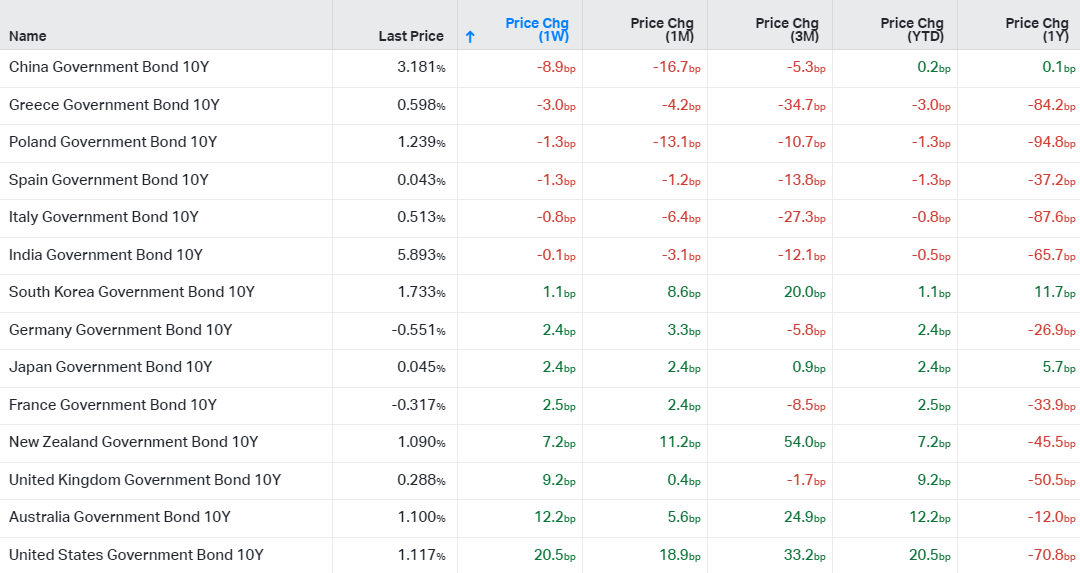

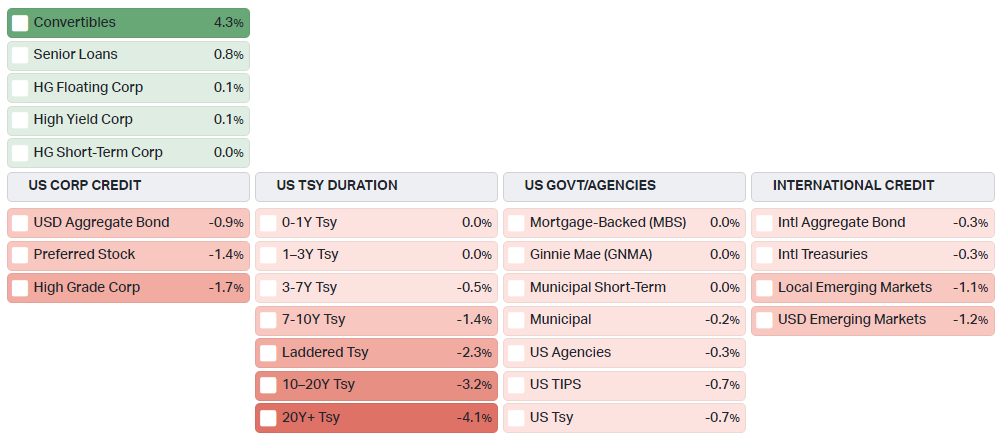

**HIGHLIGHTS**


- The highlight was definitely the US 10Y yields spiking above 1% and closing at 1.117% i.e. 20bps higher this week. 1% has been a key psychological level for the market, since yields had been flirting with that level for quite some time now and had been stuck in a range of about 0.87% and 0.99%, after hitting a low of 0.318% in March. Although one of the most cited reasons for the breakout has been the expectations a Democrat controlled Congress, which would have the clout to pass more fiscal stimulus and spending, bolstering economic activity and debt issuance, the commentary from Fed officals regarding tapering of bond purchases or 'QE' has also had a significant contribution in this ugly start for treasuries in 2021. Additionally, as flagged earlier, we are bound to see short positioning re-emerge via momentum traders i.e. CTAs. CTA funds “appear likely to keep closing out long positions with yields at 1.02% or higher,” Takada (Nomura) wrote in a note Thursday. “We cannot rule out the possibility that CTAs could turn short,” at yields of 1.10% or higher, he said.

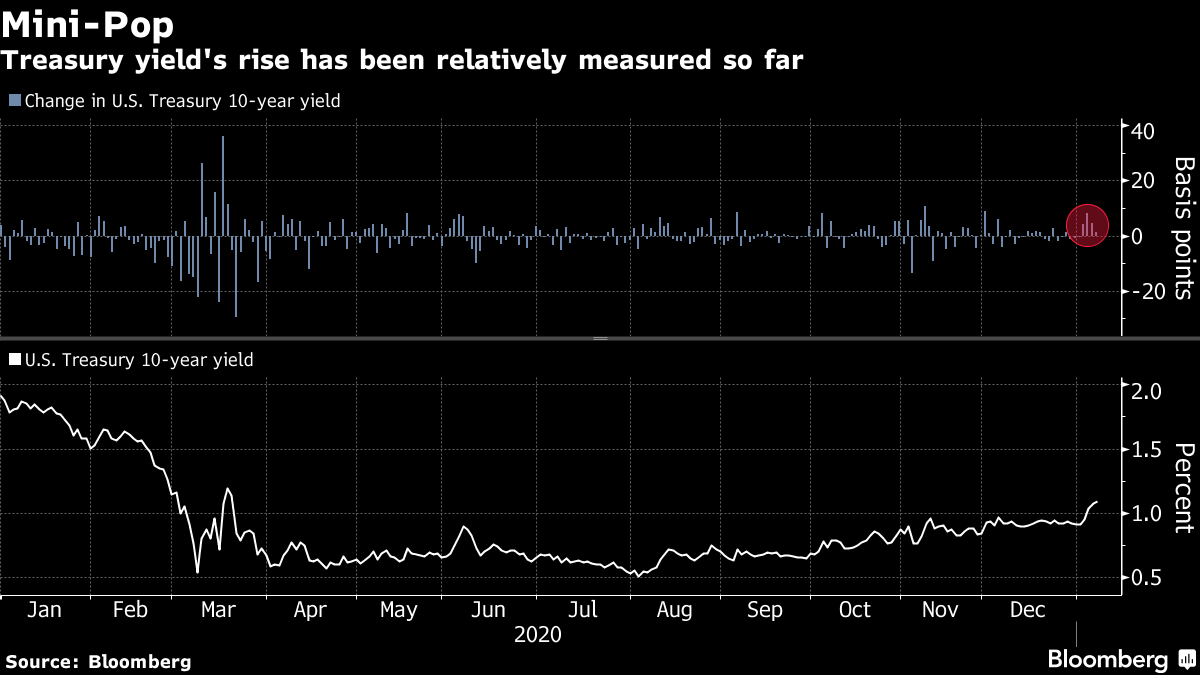

- [“I am hopeful that in fairly short order we can start to recalibrate,”](https://www.reuters.com/article/us-usa-fed-bostic/feds-bostic-says-bond-buying-recalibration-could-happen-in-2021-idINKBN2992GI?edition-redirect=in) Atlanta Fed President Raphael Bostic said on Monday.  He added that he was hopeful also that progress will be enough to let the Fed bring its asset holdings back to a level “more in line” with what existed before the pandemic. However,  Philadelphia Fed Bank President Patrick Harker said on Thursday, that the [Federal Reserve is unlikely to pare back the pace of its bond purchases in the near future](https://www.reuters.com/article/us-usa-fed-harker-purchases/feds-harker-says-he-doesnt-expect-to-taper-bond-purchases-until-late-2021-early-2022-idINKBN29C1XA?edition-redirect=in), and may not make changes until the end of 2021 or early 2022. [Vice Chairman Richard Clarida concurred with Harker](https://www.cnbc.com/2021/01/08/clarida-says-fed-bond-purchases-to-keep-pace-through-the-rest-of-the-year.html), based on his comments at a Council on Foreign Relations presentation on Friday.

- **China's 10Y bonds rallied the most** i.e. ~9bps this week, followed by European peripherals. Greece, Italy, Poland and Spain saw yields compress by 1-3bps. In Europe, only developed markets saw yields move higher, with France and Germany seeing a nominal 2.5bps increase. However, **U.K. saw the biggest slump in its 10Y bonds**, with yields rising as much as 9.2bps to 0.288%. 

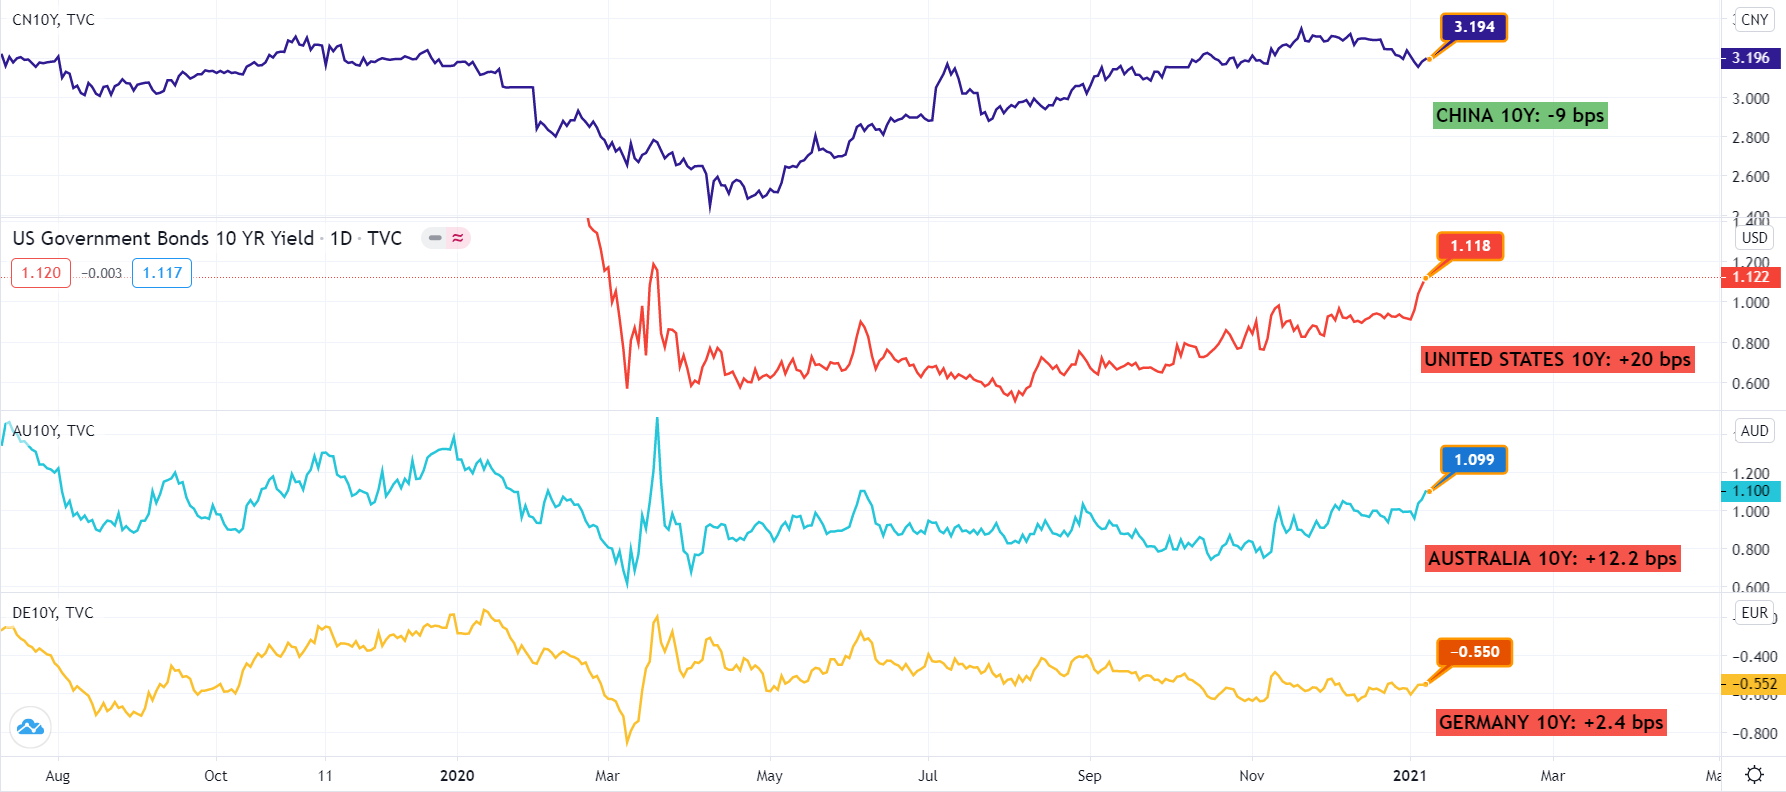

- Over the past week, Australian government bonds have displayed a high beta to UST yields, with the 10Y yields rising 12bps to 1.100%, trying to outshine Italian BTPs with higher JPY hedged yields for Japanese investors. The New Zealand 10Y paper also came through, with a 7.2bps surge this week, pushing the yield above 1% to 1.09%. Meanwhile China was the best performer not only this week, but on a monthly basis as well, with yields dipping 16bps, confirming my bullish outlook on the local currency CGBs over the past few months. 


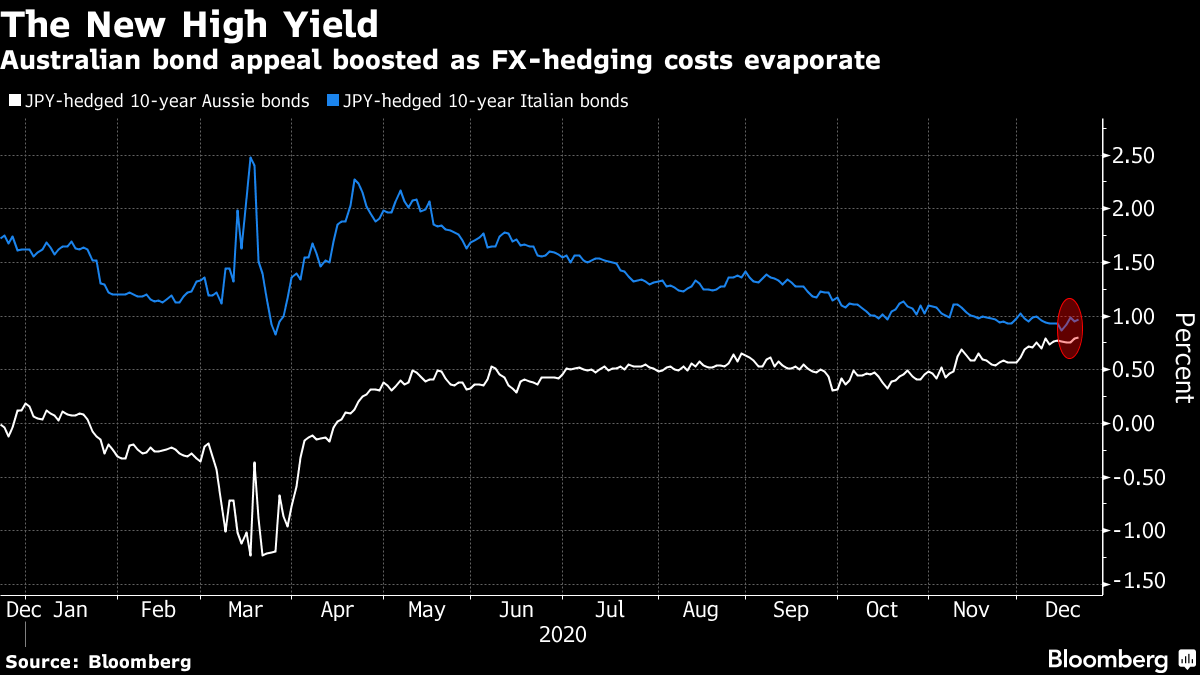

- December’s Markit emerging markets manufacturing purchasing managers’ index print of 52.8 exceeded pre-Covid levels, with 76% of countries in expansionary territory (above 50) and 53% above their previous prints. From a valuation standpoint, emerging markets still look like the place to be. Headline hard currency spreads stand at 350 basis points (bps), some way off the 289 bps level at which they started last year. On a relative basis, the sector looks attractive vs. the likes of global investment grade corporates, which have a current spread of 100 bps. Value is not evenly distributed across emerging markets, though: investment grade markets, on the whole, are trading quite tight on a historical basis, at 147 bps, whereas high yield countries look better, at 607 bps. Of course, high yield countries have their ratings for a reason, and it pays to be selective. Emerging market (EM) curves on the whole are steeper than developed and offer more roll down. Mexico, South Africa and Indonesia look appealing, with relatively steep curves, especially at the long end, alongside decent real and nominal yields, dovish central banks and high growth prospects. (All data as of 5 January 2021)



**Emerging markets generally appear to offer more value than developed markets**
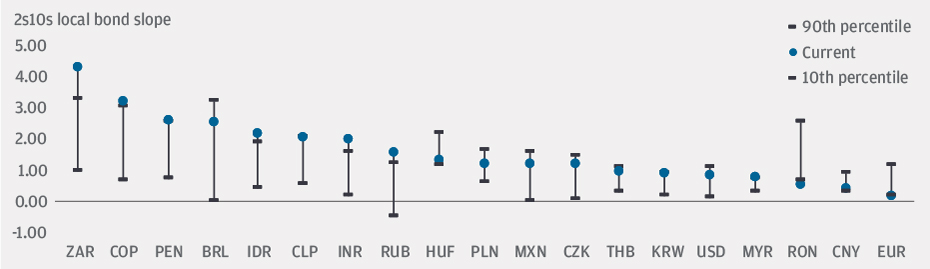
*Source: Bloomberg, J.P. Morgan Asset Management; data as of 1 January 2021. Percentiles use five-year history; 2s10s local bond slope is the local currency 10-year yield minus the two-year yield.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [48]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [49]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [50]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap

style = {'description_width': 'initial'}
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [51]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg WTD (%)'].values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg YTD (%)'].values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- **USD**: The DXY rose 0.145% WoW to close at the 90 mark. PMI data was positive, although a negative ADP employment figure caused some concern. Besides, Capitol unrest and US-China relations partly contributed to some risk aversion, and the rebound. With a presidential transition ahead, dollar may resume its downtrend ahead. The Democrat sweep in the Georgia Senate elections may also help push this trend, especially if stimulus passes faster-than-expected.


- **EUR**: The euro extended losses to trade around 1.223 on Friday, moving further away from Wednesday's two-and-a-half-year high of 1.234, amid concerns over rising COVID-19 cases, fresh lockdowns and the slow pace of vaccination. However it rose 0.75% WoW. Meanwhile, economic data showed German industrial production came in better-than-expected in November, as well as exports and imports for the same period; while data from France showed a record slump in household consumption, as well as the first decline in industrial output since April. On Thursday, the ECB's economic bulletin showed that Euro Area economic indicators pointed to a fourth-quarter economic contraction. The central bank also said that the prospects for the roll-out of vaccines were encouraging but it would “take time” before widespread immunity was reached and the economy could return to normal.


- **JPY**: The Japanese Yen lost 0.54% to 3-week lows of 103.885 against the dollar this week, as Prime Minister Yoshihide Suga declared a state of emergency in the Tokyo metropolitan area, authorizing more robust measures to fight a recent surge in coronavirus infections as Japan reported a record 7563 new cases on Thursday. Meantime, Senior officials from Japan’s finance ministry, central bank and financial regulator met in a show of vigilance over a strong yen, reflecting increased nervousness among authorities after the yen strengthened to as high as 102.59 against the dollar Wednesday, a nine-month high, pushing Japanese exporters closer to loss-making levels when they are already facing lower demand amid the pandemic. In local data, household spending in Japan rose 1.1% in real terms in November from the previous year following a 1.9% gain in the previous month while the country's leading economic index jumped to a three-year high.


- **GBP**: The British pound traded 0.75% lower this week and was last seen around the USD 1.36 level on Friday, remaining below Monday's two-and-a-half-year high of USD 1.37, amid expectations that the Bank of England will be announcing more policy easing in the coming months, as Britain's coronavirus crisis intensified and as a new national lockdown was announced this week. Money markets now expect the central bank to slash interest rates into negative territory as early as May, with few analysts expecting an even earlier cut, compared with an August estimate made last month.


- **CNY**: The Chinese Yuan continued its strong momentum, rising 0.84% to 6.45926 against the dollar this week, after the onshore rate was set at 6.4708. The Yuan looked set for its best week in two months, despite fresh measures rolled out by the central bank overnight to ease capital inflows and slow the currency's rally. On the coronavirus front, health authorities ordered the lockdown of Shijiazhuang, a city of 11 million people near Beijing. Meantime, Secretary of State Mike Pompeo said Thursday Washington may sanction those involved in the arrest of over 50 people in Hong Kong. On the data front, China's foreign exchange reserves rose to USD 3.217 trillion in December, the highest since May 2016.


- **EMFX:** The Bovespa index rose 1.8% to a record high, while MSCI's index of Latam stocks rose 0.4% to a 10-month high on Friday, and was set to add 2.5% this week. MSCI's index of emerging market stocks rose 2% to hit a record high for the first time since November 2007. But in local foreign exchange markets, this optimism was cut short as coronavirus infections in major Latin American economies rose at record rates. Brazil's Real and South Africa's Rand were the biggest losers, dropping 4% and 6% respectively WoW, while Turkish Lira surged 1.5%. Korean Won and Russian Ruble lost around 0.7% while Mexican Peso and Chilean Peso fared slightly better with a fall of 0.6% and 0.3% this week.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [52]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [61]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [54]:
df = pd.read_excel('comd1.xlsx', header=0, index_col=0)

In [57]:
week = df.pct_change(5).iloc[-1,:]
month = df.pct_change(21).iloc[-1,:]
ytd = df.iloc[-1,:]/df[date(date.today().year-1, 12, 31):].iloc[0,:]-1
yr = df.pct_change(252).iloc[-1,:]

def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], week, month, ytd, yr], axis=1)
    oned_lcl.columns = ['Price (EOD)', '1W(%)', '1M(%)', 'YTD(%)', '1Y(%)' ]
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [75]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", '1W(%)': "{:.2%}", '1M(%)': "{:.2%}",
                               'YTD(%)': "{:.2%}", '1Y(%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', '1W(%)'), ('1 Month', '1M(%)'), ('YTD', 'YTD(%)'), ('1 Year', '1Y(%)')),
                                                value = '1W(%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', '1W(%)'), ('1 Month', '1M(%)'), ('…

In [72]:
def perf_comd(timeframe):
    weekly_usd = comd.copy()
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='1W(%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['1W(%)']*100)).dropna().sort_values(by='1W(%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['1W(%)'].values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='YTD(%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['YTD(%)']*100)).sort_values(by='YTD(%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['YTD(%)'].values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

- **Oil** markets have caught some breath this week, with the international benchmark Brent Crude hovering above USD 56 a barrel after major oil producers agreed to roll over existing oil output levels into February. WTI crude futures jumped more than 3.5% to 52.7 a barrel on Friday, the highest on a closing basis since February of 2020, booking a 10.5% jump on the week after [Saudi Arabia pledged to cut output by 1 million barrels per day in February and March](https://www.bloomberg.com/news/articles/2021-01-05/saudi-arabia-said-to-plan-voluntary-oil-output-cut-in-february). The move also persuaded other producers to leave output supplies unchanged and allowed Russia and Kazakhstan to lift production. Supporting prices further were a much bigger-than-expected drop in US crude stocks and a double victory of the Democrats in the Senate in Georgia, which paved the way for more stimulus in the world’s largest economy. Also, geopolitical tensions between Tehran and Seoul following the seized of a South Korean Vessel by Iran’s Revolutionary Guards in the strait of Hormuz lifted sentiment.

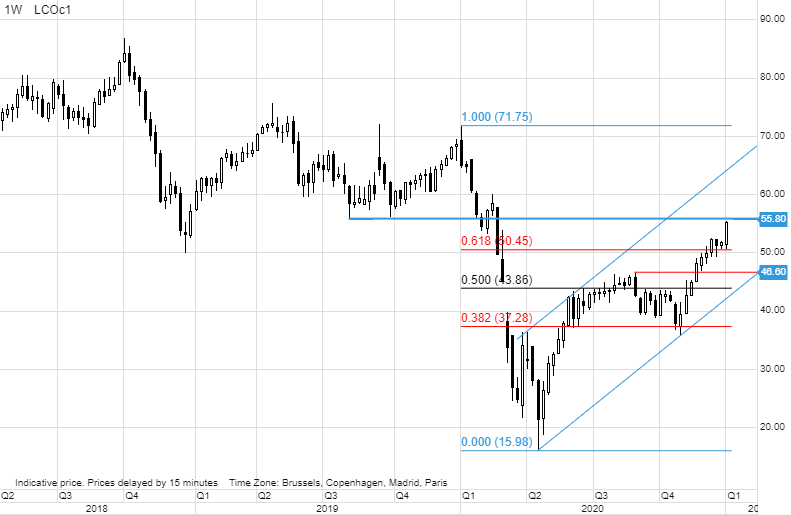

- While the Saudi move has been supporting oil prices all week, the tightening supplies out of the world’s top oil exporter have apparently upended the plans of Asian oil buyers. A day later, the [Saudis also raised the official selling prices (OSPs) of their oil for Asia for February](https://www.reuters.com/article/RCOMUS_Energy/idUSKBN29B22A), lifting the price of the flagship Arab Light grade by USD 0.70 a barrel to a premium of USD 1 per barrel against the Middle East benchmark, the Oman/Dubai average. The major cut and the higher prices from the Kingdom have prompted Asian refiners to source oil from elsewhere, and North Sea cargoes seem to have benefited from the Saudi production cut. 


- According to Reuters, [seven crude oil cargoes from the North Sea were bought and sold during a trading window on Thursday alone, and this, according to an oil trading source, was a daily record](https://www.nasdaq.com/articles/record-seven-north-sea-cargoes-trade-on-platts-as-saudi-cuts-tighten-market-2021-01-07) for North Sea cargoes traded in one day in recent history. Typically, one or two cargoes of 600,000 barrels of crude each are being traded on a normal day in normal circumstances, according to Reuters. Four of the seven North Sea cargoes on Thursday were acquired by China’s Unipec, the trading arm of the largest oil refiner in Asia, Sinopec, trade sources told Reuters.



- Speculators have responded very forcefully to the improved sentiment during the past six months and as we enter 2021, they hold a total net long across 24 major commodity futures of 2.5 million lots, representing a nominal value of USD 125 billion. While the two previous peaks in 2017 and 2018 were primarily led by the crude oil market, the chart below shows how bullish bets have been spread out more evenly between the three major sectors of energy, metals and agriculture.


- Overall, the biggest bets are held in crude oil with the combined 614k lots long in WTI and Brent representing a nominal value of USD 30 billion, gold's 137k lots long at a value of USD 26 billion and finally the soybean complex where the net long in soybeans, meal and oil reached 399k lots or USD 19 billion nominal. The net long in crude oil and gold, the two biggest contracts in terms of exposure, remains well below their previous peaks which for crude oil was the 1.1 million lots reached in March 2018 and 292k lots in gold that was reached in September 2019. 


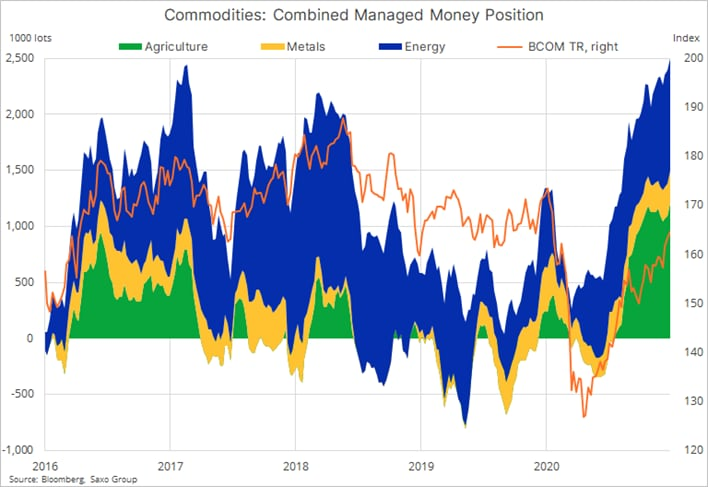




- **HG Copper**, meanwhile, rolled over the strong bid from December to record its best week (+4.36% WoW) since July 2020 on a combination of speculative reflation and underlying physical demand. China, the worlds biggest consumer, has been the main driver behind the 75% rally since the low last March and the expectation now is that a vaccine-led global recovery will fuel demand beyond China. Not least as the de-carbonization focus accelerates the electrification process thereby increasing demand for copper due its use as a conductor of heat and electricity. Following the break above USD 3.65/lb on HG copper, it is difficult to find much in terms of resistance before USD 4.0/lb.


- **Nickel futures surged 7%** this week to a four-month high in January, rising above USD 18,000 per tonne, after an earthquake in Indonesia triggered supply concerns and on strong demand from factories in China and Europe. Markit PMI data showed activity in the Eurozone’s factory sector grew at its fastest pace since May 2018 while surveys in China showed the world’s top consumer of industrial metals sustained its recovery to pre-pandemic levels.


- **Rhodium** prices skyrocketed to above USD 18,000 an ounce in January, its highest level on record due to stricter rules on car emissions. Car companies in Europe and China are using more rhodium to meet tougher clean-air legislation and car sales in China have rebounded in recent months. Also, supply from South Africa, the biggest producer, has been disrupted by the coronavirus pandemic and lack of investment in new mines over the past decades.


- **Silver plunged** more than 6% to USD 25.4 an ounce on Friday, the lowest on a closing basis since December 22nd, taking the weekly loss to 7.12%. **Gold** also sank around 3.3% to below USD 1850 an ounce on Friday, the lowest level in near a month. The precious metal was down 3.5% on the week. **Platinum** and **Palladium** held out better, with a weekly drop of 0.3% and 3% respectively.

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [73]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)